In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [ ]:
df = pd.read_csv("/content/drive/My Drive/heart_statlog_cleveland_hungary_final.csv")
df.head(10)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,4,140,207,0,0,130,1,1.5,2,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [ ]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


# CRISP-DM Methodology

## 1. Data Understanding (EDA)

### 1.1 Checking for Missing Values

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
chest pain type,0
resting bp s,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0
oldpeak,0


### 1.2 Check for Duplicate Values

In [ ]:
df.nunique()

,0
age,50
sex,2
chest pain type,4
resting bp s,67
cholesterol,222
fasting blood sugar,2
resting ecg,3
max heart rate,119
exercise angina,2
oldpeak,53


### 1.3 Class Distribution

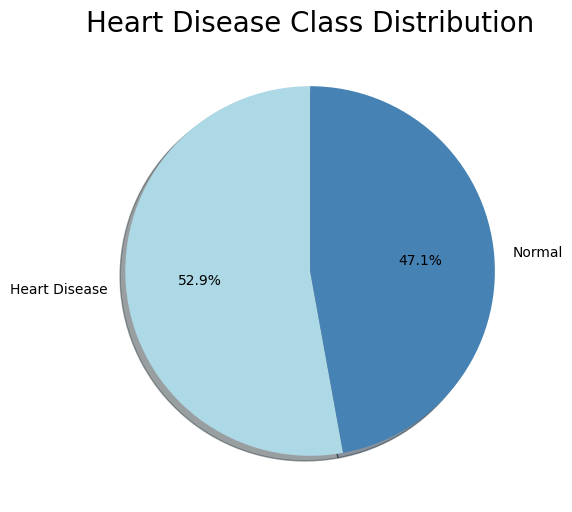

In [ ]:
class_count = df['target'].value_counts()
plt.figure(figsize = (8, 6))
class_count.plot.pie(autopct = '%1.1f%%',
                     startangle = 90,
                     colors=['lightblue', 'steelblue'],
                     labels=['Heart Disease', 'Normal'],
                     shadow = True)
plt.title('Heart Disease Class Distribution', fontsize = 20)
plt.ylabel('')
plt.show()

The percentages of 52.9% for Heart Disease and 47.1% for Normal indicate that the dataset is relatively balanced.

### 1.4 Outliers Detection

In [ ]:
selected_columns = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
df_selected_columns = df[selected_columns]
df_selected_columns

,age,resting bp s,cholesterol,max heart rate,oldpeak
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0
...,...,...,...,...,...
1185,45,110,264,132,1.2
1186,68,144,193,141,3.4
1187,57,130,131,115,1.2
1188,57,130,236,174,0.0


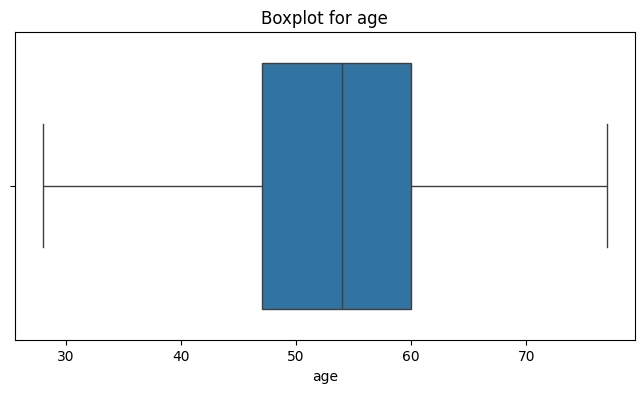

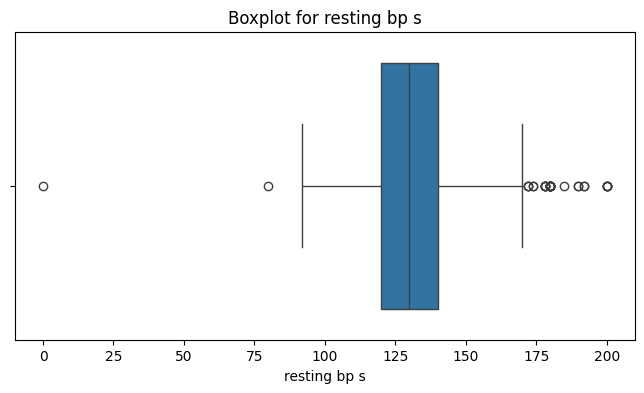

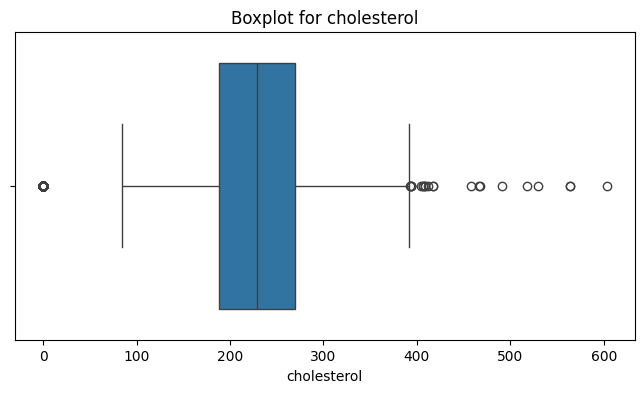

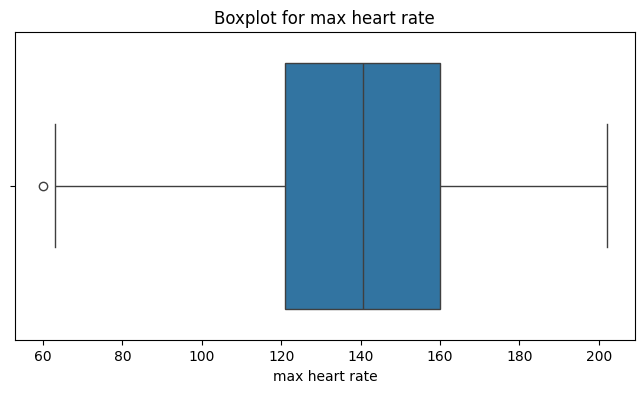

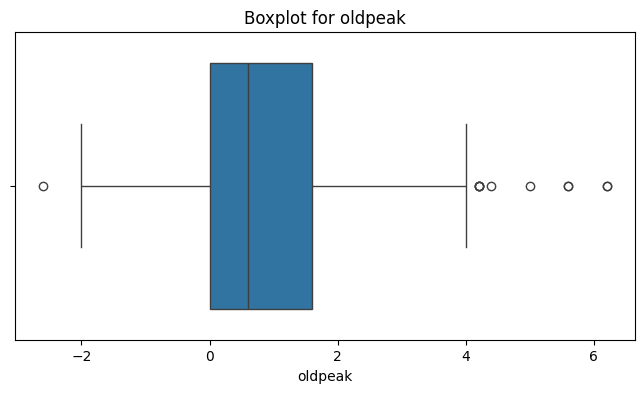

In [ ]:
# Visual method (Boxplots)
for col in selected_columns:
    plt.figure(figsize = (8,4))
    sns.boxplot(x = df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

Based on the boxplots, it is observed that there are outliers detected for some columns.
<br>Eg. in the boxplot for resting blood pressure, there is one outlier near 0 mmHg, which is highly unusual for a resting blood pressure reading.

In [ ]:
# Statistical method (Z-Score)
z_score = df[['resting bp s', 'cholesterol', 'max heart rate']].apply(zscore)
z_score

,resting bp s,cholesterol,max heart rate
0,0.427328,0.775674,1.265039
1,1.516587,-0.299512,0.637758
2,-0.117301,0.716489,-1.636136
3,0.318402,0.035867,-1.244085
4,0.971958,-0.151550,-0.695214
...,...,...,...
1185,-1.206560,0.529071,-0.303164
1186,0.645180,-0.171279,0.049682
1187,-0.117301,-0.782852,-0.969650
1188,-0.117301,0.252877,1.343449


In [ ]:
cols = ['resting bp s', 'cholesterol', 'max heart rate']

for col in cols:
    outliers = z_score[col].abs() > 3
    outlier_rows = df[outliers]
    print(f'Outliers for {col}:')
    print(outlier_rows)
    print()

Outliers for resting bp s:
      age  sex  chest pain type  resting bp s  cholesterol  \
109    39    1                2           190          241   
242    54    1                4           200          198   
366    64    0                4           200            0   
400    61    1                3           200            0   
450    55    1                3             0            0   
593    61    1                4           190          287   
734    56    0                4           200          288   
761    54    1                2           192          283   
1013   56    0                4           200          288   
1075   54    1                2           192          283   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
109                     0            0             106                0   
242                     0            0             142                1   
366                     0            0             140           

In [ ]:
outliers = (z_score.abs() > 3).any(axis=1)

# Extract total rows with outliers
outlier_rows = df[outliers]
outlier_rows

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
30,53,1,3,145,518,0,0,130,0,0.0,2,1
76,32,1,4,118,529,0,0,130,0,0.0,2,1
109,39,1,2,190,241,0,0,106,0,0.0,1,0
149,54,1,4,130,603,1,0,125,1,1.0,2,1
242,54,1,4,200,198,0,0,142,1,2.0,2,1
366,64,0,4,200,0,0,0,140,1,1.0,2,1
371,60,1,4,135,0,0,0,63,1,0.5,1,1
391,51,1,4,140,0,0,0,60,0,0.0,2,1
400,61,1,3,200,0,1,1,70,0,0.0,2,1
450,55,1,3,0,0,0,0,155,0,1.5,2,1


### 1.5 Feature Relationships

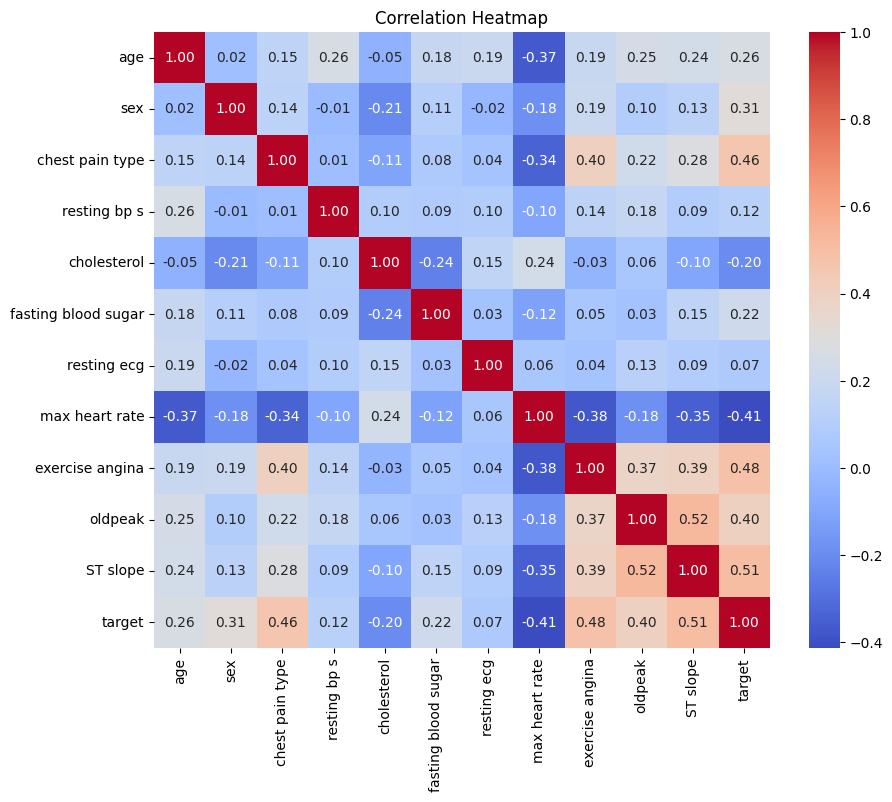

In [ ]:
correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            square=True,
            cbar=True)
plt.title("Correlation Heatmap")
plt.show()

From the correlation heatmap above, we can have some general observations and analyses:<br><br>
<b>exercise angina (0.48)</b>: Exercise-induced angina is strongly correlated with having heart disease. This makes sense since angina is a common symptom of heart issues.<br>
<b>max heart rate (-0.41)</b>: Maximum heart rate achieved during exercise has a negative correlation with heart disease. Lower heart rate tolerance during stress testing could indicate potential heart issues.<br>
<b>oldpeak and ST slope (0.52)</b>: Oldpeak (ST depression) and ST slope are highly correlated, which makes sense because they both represent ECG-related variables and often work together to indicate heart stress.

## 2. Data Preparation

### 2.1 Remove Outliers

In [ ]:
df_cleaned = df[~outliers]
df_cleaned

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


### 2.2 Feature Selection (Lasso Regression)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

df_x = df_cleaned.drop(columns=['target'])
df_y = df_cleaned['target']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(df_x)

lasso = Lasso(alpha = 0.1, random_state = 42)
lasso.fit(x_scaled, df_y)

# Extract the coefficients
coefficients = lasso.coef_

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': df_x.columns,
    'Coefficient': coefficients
})

# Filter non-zero coefficients
selected_features = feature_importance[feature_importance['Coefficient'] != 0]
print("Selected Features:")
print(selected_features)

# Use only the selected features for further steps
df_features = df_x[selected_features['Feature']]

Selected Features:
            Feature  Coefficient
1               sex     0.015547
2   chest pain type     0.067224
7    max heart rate    -0.024124
8   exercise angina     0.061667
9           oldpeak     0.007635
10         ST slope     0.096051




```

```

### 2.3 Standardized Data

In [ ]:
scaler = StandardScaler()
standardized_features = scaler.fit_transform(df_features)
standardized_features

array([[ 0.5547002 , -1.31346128,  1.27329623, -0.7946273 , -0.84968829,
        -1.01842706],
       [-1.80277564, -0.24650139,  0.63977051, -0.7946273 ,  0.07410851,
         0.62478469],
       [ 0.5547002 , -1.31346128, -1.65676022, -0.7946273 , -0.84968829,
        -1.01842706],
       ...,
       [ 0.5547002 ,  0.8204585 , -0.98363915,  1.2584516 ,  0.25886787,
         0.62478469],
       [-1.80277564, -1.31346128,  1.35248695, -0.7946273 , -0.84968829,
         0.62478469],
       [ 0.5547002 , -0.24650139,  1.31289159, -0.7946273 , -0.84968829,
        -1.01842706]])

## 3. Modeling


### Logistic Regression
### Random Forest
### Naive Bayes
### Support Vector Machine
### Gradient Boosting

### 3.1 Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(standardized_features, df_cleaned['target'], test_size=0.2, random_state=42)

print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)


Training Set Size: (938, 6)
Testing Set Size: (235, 6)


### 3.2 Logistic Regression

Logistic Regression Accuracy: 0.8340425531914893


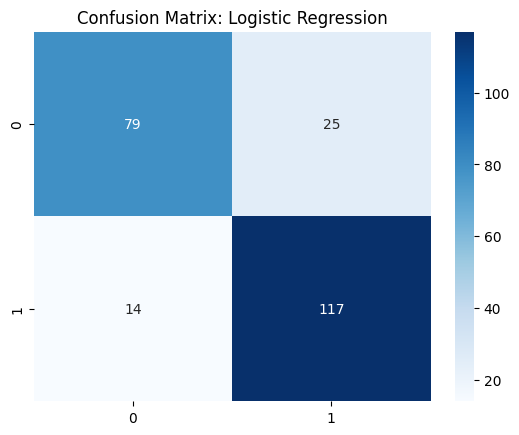

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Hyperparameter Tuning
param_grid_logistic = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
grid_logistic = GridSearchCV(LogisticRegression(random_state=42), param_grid_logistic, cv=5)
grid_logistic.fit(X_train, y_train)

# Best parameters and evaluation
best_logistic = grid_logistic.best_estimator_
y_pred_logistic = best_logistic.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
sns.heatmap(confusion_matrix(y_test, y_pred_logistic), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: Logistic Regression")
plt.show()


### 3.3 Random Forest

Random Forest Accuracy: 0.8893617021276595


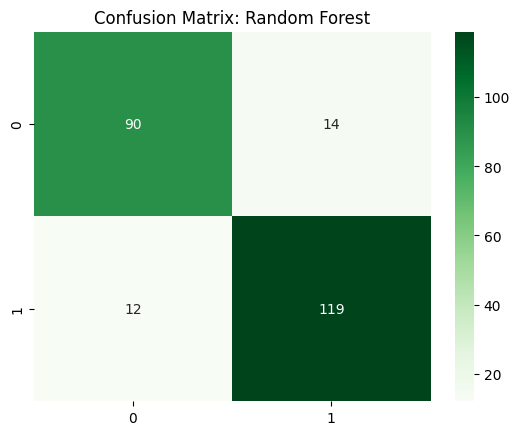

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)

# Best parameters and evaluation
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix: Random Forest")
plt.show()


### 3.4 Naive Bayes

Naive Bayes Accuracy: 0.8127659574468085


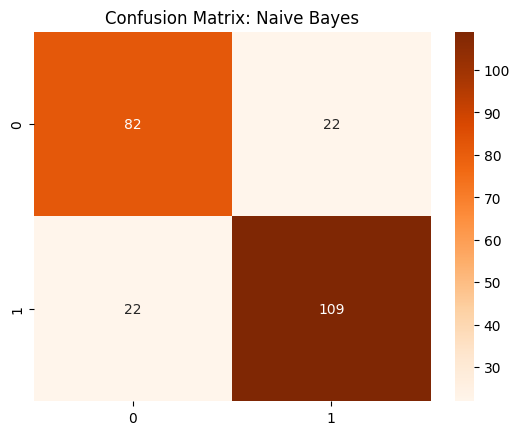

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Evaluation
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix: Naive Bayes")
plt.show()


### 3.5 Support Vector Machine (SVM)



SVM Accuracy: 0.8382978723404255


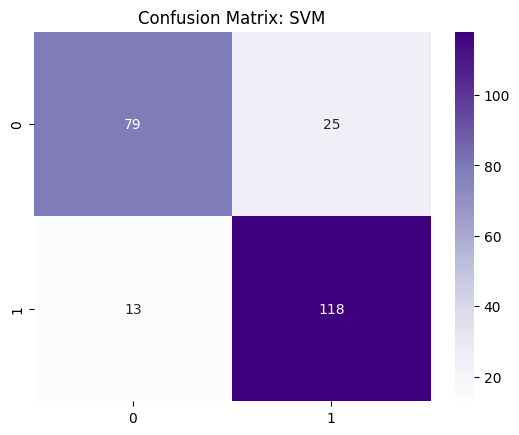

In [ ]:
from sklearn.svm import SVC

# Train SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Hyperparameter Tuning
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5)
grid_svm.fit(X_train, y_train)

# Best parameters and evaluation
best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix: SVM")
plt.show()


### 3.6 Gradient Boosting (XGBoost)



In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Define parameter grid for manual tuning
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

best_score = 0
best_params = {}

# Manual tuning loop
for n_estimators in param_grid_xgb['n_estimators']:
    for max_depth in param_grid_xgb['max_depth']:
        for learning_rate in param_grid_xgb['learning_rate']:
            params = {
                'objective': 'binary:logistic',
                'n_estimators': n_estimators,
                'max_depth': max_depth,
                'learning_rate': learning_rate,
                'random_state': 42
            }
            xgb_model = xgb.XGBClassifier(**params)
            xgb_model.fit(X_train, y_train)
            y_pred = xgb_model.predict(X_test)
            score = accuracy_score(y_test, y_pred)

            # Update best parameters
            if score > best_score:
                best_score = score
                best_params = params

print("Best Parameters:", best_params)
print("Best Accuracy:", best_score)

# Train the final model with the best parameters
final_xgb_model = xgb.XGBClassifier(**best_params)
final_xgb_model.fit(X_train, y_train)
y_pred_xgb = final_xgb_model.predict(X_test)
print("Final XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))


Best Parameters: {'objective': 'binary:logistic', 'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.2, 'random_state': 42}
Best Accuracy: 0.8936170212765957
Final XGBoost Accuracy: 0.8936170212765957


## 4. Model Evaluation

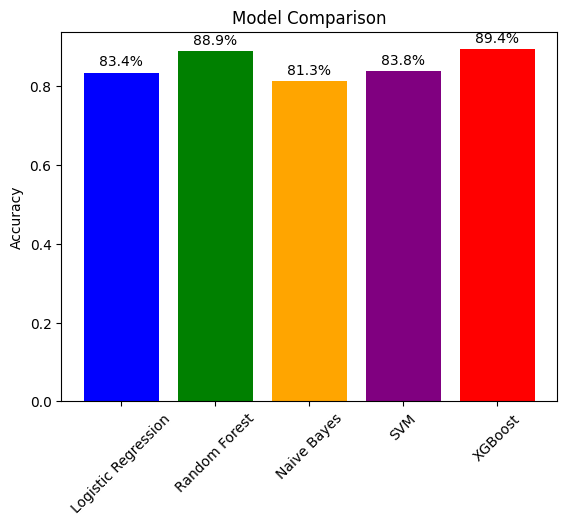

In [ ]:
# Compare all models
models = ["Logistic Regression", "Random Forest", "Naive Bayes", "SVM", "XGBoost"]
accuracies = [
    accuracy_score(y_test, y_pred_logistic),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_nb),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_xgb)
]
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc * 100:.1f}%", ha='center', va='bottom', fontsize=10, color='black')

plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'purple', 'red'])
plt.title("Model Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()


### 4.1 Evaluation Metrics (Precision, Recall, F1-Score and ROC-AUC Score)


Comparison of Metrics:
                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Logistic Regression  0.834043   0.823944  0.893130  0.857143  0.900873
Random Forest        0.889362   0.894737  0.908397  0.901515  0.958786
Naive Bayes          0.812766   0.832061  0.832061  0.832061  0.886340
SVM                  0.838298   0.825175  0.900763  0.861314  0.913939
XGBoost              0.893617   0.901515  0.908397  0.904943  0.953024


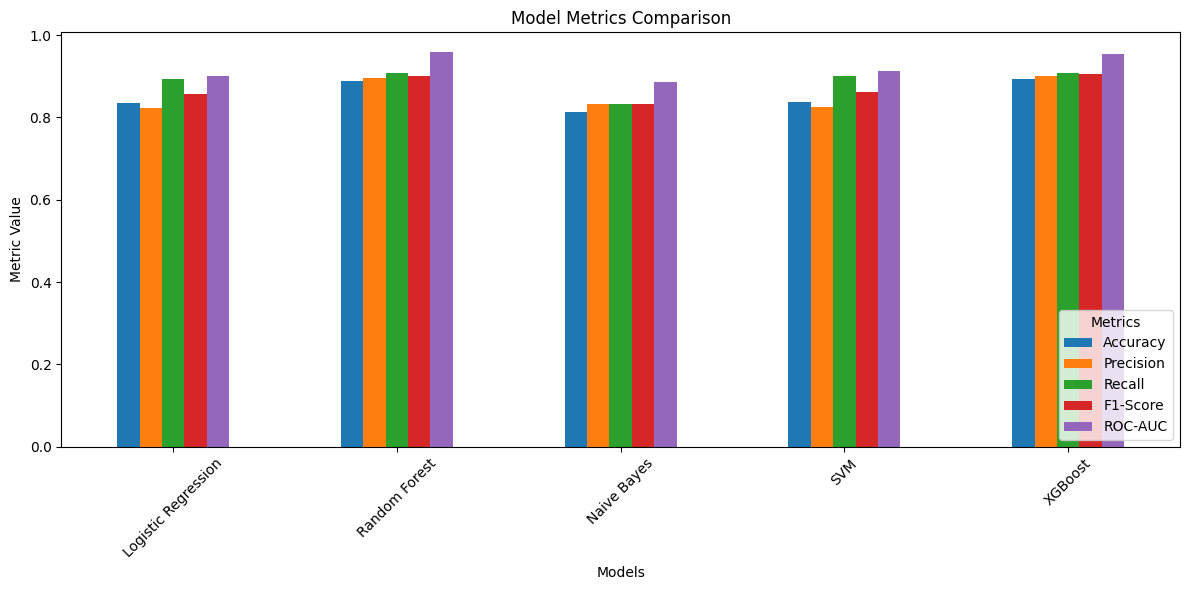

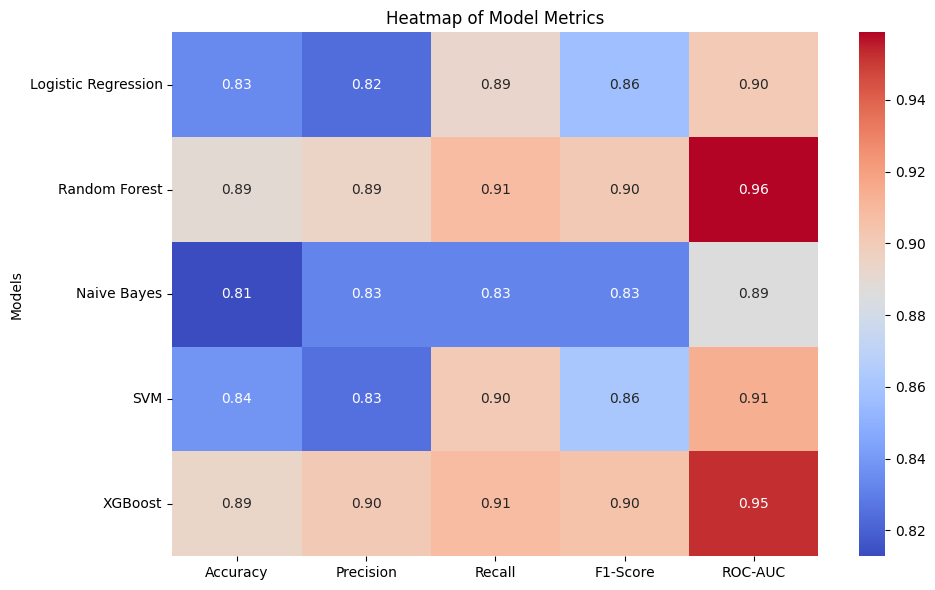

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report

evaluation_metrics = {}

models = ["Logistic Regression", "Random Forest", "Naive Bayes", "SVM", "XGBoost"]
predictions = [y_pred_logistic, y_pred_rf, y_pred_nb, y_pred_svm, y_pred_xgb]
probabilities = [
    logistic_model.predict_proba(X_test)[:, 1],  # Logistic Regression
    best_rf.predict_proba(X_test)[:, 1],        # Random Forest
    nb_model.predict_proba(X_test)[:, 1],        # Naive Bayes
    best_svm.decision_function(X_test),         # SVM (decision function for probabilities)
    final_xgb_model.predict_proba(X_test)[:, 1]        # XGBoost
]

for i, model_name in enumerate(models):
    y_pred = predictions[i]
    y_prob = probabilities[i]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    evaluation_metrics[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    }

# Create a DataFrame for better visualization
import pandas as pd
metrics_df = pd.DataFrame(evaluation_metrics).T
print("\nComparison of Metrics:")
print(metrics_df)

# Bar chart for each metric
metrics_df.plot(kind="bar", figsize=(12, 6))
plt.title("Model Metrics Comparison")
plt.ylabel("Metric Value")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.legend(loc='lower right', title="Metrics")
plt.tight_layout()
plt.show()

# Heatmap for better visualization of metrics
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Model Metrics")
plt.ylabel("Models")
plt.tight_layout()
plt.show()

## 5. Deployment

### 5.1 Saving Models (Random Forest & XGBoost)

In [ ]:
import pickle

rf_filename = 'rf_model.pkl'
xbg_filename = 'xbg_model.pkl'
pickle.dump(best_rf, open(rf_filename, 'wb'))
pickle.dump(final_xgb_model, open(xbg_filename, 'wb'))